In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


In [4]:
data=pd.read_csv("Company_Data (1).csv")

In [5]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
data["sales"]=1

In [7]:
l=[]
for i in data["Sales"]:
    if i>9:
        l.append("Good")
    else:
        l.append("Bad")
data["sales"]=l
data
        

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [8]:
data1=data.drop(["Sales"],axis=1)

In [9]:
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [10]:
label_encoder=LabelEncoder()
data1["ShelveLoc"]=label_encoder.fit_transform(data1["ShelveLoc"])
data1["Urban"]=label_encoder.fit_transform(data1["Urban"])
data1["US"]=label_encoder.fit_transform(data1["US"])
data1["sales"]=label_encoder.fit_transform(data1["sales"])

In [13]:
data1.sample(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
379,125,111,0,404,107,0,54,15,1,0,0
227,113,64,10,68,101,2,57,16,1,1,0
366,124,56,11,447,134,2,53,12,0,1,0
297,118,83,13,276,104,0,75,10,1,1,0
159,119,60,0,372,70,0,30,18,0,0,1
393,109,51,10,26,120,2,30,17,0,1,0
136,131,75,0,10,120,0,31,18,0,0,0
176,138,107,9,480,154,2,47,11,0,1,0
23,121,31,0,292,109,2,79,10,1,0,0
336,138,35,6,60,143,0,28,18,1,0,0


In [19]:
data1.shape

(400, 11)

<AxesSubplot:xlabel='Education', ylabel='sales'>

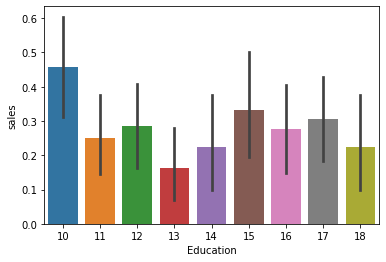

In [14]:
sns.barplot(data1["Education"],data1["sales"])

<AxesSubplot:xlabel='Advertising', ylabel='sales'>

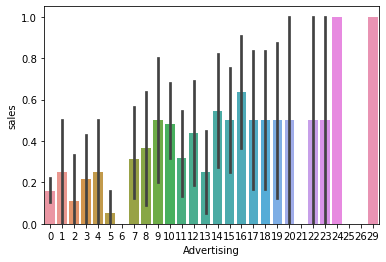

In [15]:
sns.barplot(data1["Advertising"],data1["sales"])

In [16]:
data1.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869,0.014802
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601,0.128279
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460,0.286961
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564,0.055384
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861,-0.339047
ShelveLoc,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760,0.028367
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652,-0.182731
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250,-0.060891
Urban,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085,-0.020273
US,0.016869,0.089601,0.684460,0.060564,0.057861,-0.039760,0.008652,-0.078250,0.047085,1.000000,0.221820


<AxesSubplot:>

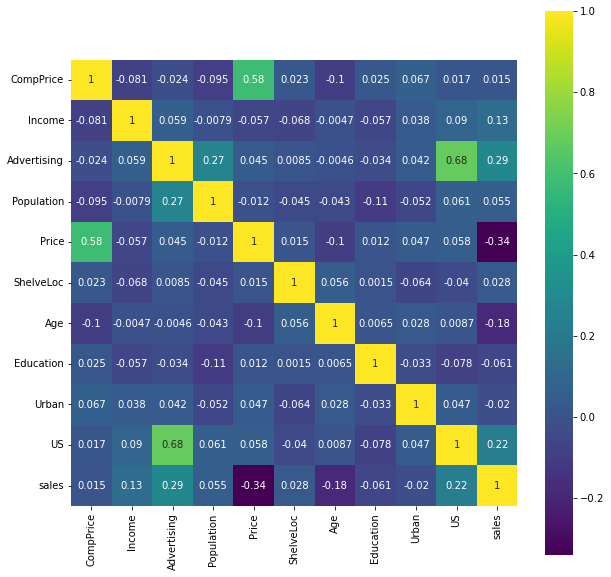

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),vmax=1,square=True,annot=True,cmap='viridis')

In [27]:
array=data1.values

In [28]:
X=array[:,0:10]
Y=array[:,-1]

In [29]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [30]:
X.shape

(400, 10)

In [31]:
Y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [32]:
num_trees=100
max_features=5
kfold=KFold(n_splits=10,shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,max_features=max_features,random_state=0)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.8375


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [34]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [35]:
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.8024999999999999


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
num_trees=range(1,50)
k_scores=[]

In [37]:
for k in num_trees:
    rf=RandomForestClassifier(n_estimators=k)
    scores=cross_val_score(rf,X,Y,cv=10)
    k_scores.append(scores.mean())

([<matplotlib.axis.XTick at 0x1c5ae685df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

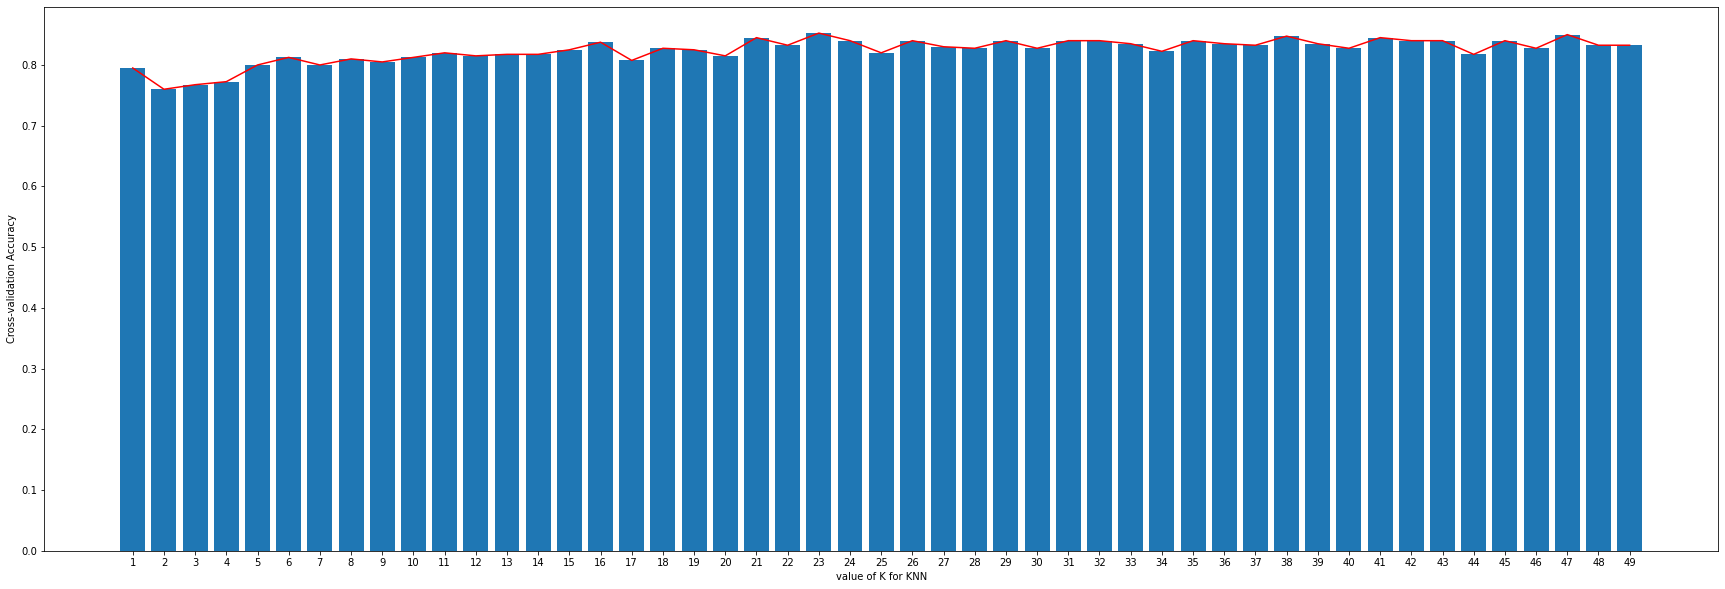

In [38]:
plt.figure(figsize=(30,10))
plt.bar(num_trees,k_scores)
plt.plot(num_trees,k_scores,color="red")

plt.xlabel('value of K for KNN')
plt.ylabel('Cross-validation Accuracy')
plt.xticks(num_trees)

In [39]:
k_scores

[0.795,
 0.76,
 0.7675,
 0.7725000000000001,
 0.7999999999999999,
 0.8125,
 0.8,
 0.8099999999999999,
 0.805,
 0.8125,
 0.82,
 0.8150000000000001,
 0.8174999999999999,
 0.8175000000000001,
 0.825,
 0.8375,
 0.8075000000000001,
 0.8275,
 0.825,
 0.8150000000000001,
 0.845,
 0.8324999999999999,
 0.8525,
 0.8400000000000001,
 0.8200000000000001,
 0.8400000000000001,
 0.8299999999999998,
 0.8275,
 0.8399999999999999,
 0.8275,
 0.8399999999999999,
 0.8400000000000001,
 0.835,
 0.8225,
 0.8399999999999999,
 0.835,
 0.8324999999999999,
 0.8474999999999999,
 0.835,
 0.8275,
 0.845,
 0.8400000000000001,
 0.8400000000000001,
 0.8175000000000001,
 0.8400000000000001,
 0.8275,
 0.85,
 0.8325000000000001,
 0.8324999999999999]

# AdaBoost classification

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
num_trees = 23
seed=7
kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees, learning_rate=0.8,random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8724999999999999


# Bagging 

In [43]:
from sklearn.ensemble import BaggingClassifier

In [45]:
num_trees = 23
model = BaggingClassifier( max_samples=0.8,n_estimators=num_trees,random_state=8)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.8125
